In [2]:
import pickle
from string import punctuation

import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
import logging
logger = logging.getLogger("spacy")
logger.setLevel(logging.ERROR)

import dask.bag as db
import json

docs = db.read_text('arxiv-metadata-oai-snapshot.json').map(json.loads)

In [11]:
docs.take(1)

({'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

In [ ]:
# Trimming the data
get_latest_version = lambda x: x['versions'][-1]['created']


# get only necessary fields of the metadata file
trim = lambda x: {'id': x['id'],
                  'authors': x['authors'],
                  'title': x['title'],
                  'doi': x['doi'],
                  'category':x['categories'].split(' '),
                  'abstract':x['abstract'],}

# filter for papers published on or after 2019-01-01
columns = ['id','category','abstract']
docs_df = (docs.filter(lambda x: int(get_latest_version(x).split(' ')[3]) > 2019)
           .map(trim).
           compute())

# convert to pandas
docs_df = pd.DataFrame(docs_df)

In [11]:
#save trimmed dataset for later use so we can skip the dataset trimming later:
docs_df.to_csv("trimmed_arxiv_docs.csv", index=False)

In [3]:
# Read docs from the file
docs_df = pd.read_csv('trimmed_arxiv_docs.csv')

C:\Users\miami\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#The first 5 rows:
docs_df.head()

,id,authors,title,doi,category,abstract
0,704.0479,T.Geisser,The affine part of the Picard scheme,NaN,"['math.AG', 'math.KT']",We describe the maximal torus and maximal un...
1,705.0825,Ram Gopal Vishwakarma (Zacatecas University),Einstein's Theory of Gravity in the Presence o...,10.1007/s10509-009-0016-8,"['gr-qc', 'astro-ph', 'hep-th']",The mysterious `dark energy' needed to expla...
2,705.4004,Samy Skander Bahoura (IMJ),About Brezis-Merle Problem with Lipschitz cond...,NaN,['math.AP'],We give blow-up analysis for a Brezis-Merle'...
3,705.406,Ruy Exel and Artur O. Lopes,C*- Algebras and Thermodynamic Formalism,NaN,"['math.DS', 'math.OA']",We present a detailed exposition (for a Dyna...
4,705.4151,"Maria Deijfen, Henri van den Esker, Remco van ...",A preferential attachment model with random in...,10.1007/s11512-007-0067-4,"['math.PR', 'math.CO']","In this paper, a random graph process ${G(t)..."


In [4]:
# Listing categories
categories = list(docs_df['category'].unique())
for i in categories:
    print(i)
        

['math.AG', 'math.KT']
['gr-qc', 'astro-ph', 'hep-th']
['math.AP']
['math.DS', 'math.OA']
['math.PR', 'math.CO']
['math.AC', 'math.AG']
['math.AG']
['quant-ph']
['math.QA', 'math.RA']
['math.NT', 'math.AG']
['math.GT', 'math.GR']
['hep-ph']
['physics.gen-ph']
['math.RT', 'math.CO']
['hep-th', 'cond-mat.other']
['math.AC']
['cond-mat.mes-hall', 'nlin.CD']
['math.DS']
['math.AT', 'math.GR']
['math.AG', 'math.NT']
['math.CO']
['astro-ph']
['math.HO']
['physics.class-ph']
['math.NT', 'math.CO']
['cond-mat.supr-con', 'cond-mat.mes-hall']
['math.NT']
['physics.optics', 'physics.gen-ph']
['math.LO']
['math.CO', 'cs.DM', 'math.GM']
['math.RT', 'math.AG']
['gr-qc']
['math.KT']
['math.NT', 'math.OA']
['math.DS', 'math.HO']
['cs.OH']
['math.DG']
['quant-ph', 'cs.CR']
['math.GT']
['math.GM']
['cond-mat.other', 'hep-lat', 'hep-th', 'quant-ph']
['math.RT']
['math.PR', 'math.ST', 'stat.TH']
['q-bio.BM']
['physics.ao-ph', 'math.AP', 'nlin.PS', 'nlin.SI', 'physics.comp-ph', 'physics.geo-ph']
['cs.CC']


In [5]:
# Split categories
def splitCategory(cat):
    tmp = cat.replace('[','').replace(']','')
    c = tmp.split(', ')
    c = [w.replace("'","") for w in c]
    return c

In [6]:
# Find main category
def findMainCat(categories):
    new_cat = list(dict.fromkeys([cat.split(".")[0] for cat in categories]))
    return new_cat


Cleaning the data

In [7]:
df = pd.read_csv("./trimmed_arxiv_docs.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373498 entries, 0 to 373497
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        373498 non-null  object
 1   authors   373498 non-null  object
 2   title     373498 non-null  object
 3   doi       115963 non-null  object
 4   category  373498 non-null  object
 5   abstract  373498 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [8]:
# Adding abstract word count
df['abstract_word_count'] = docs_df['abstract'].apply(lambda x: len(x.strip().split())) 

In [9]:
df['abstract'].describe(include='all')

count                                                373498
unique                                               373430
top         Light-fidelity (LiFi) is a fully-networked b...
freq                                                      2
Name: abstract, dtype: object

In [10]:
# Getting rid of duplicates
df.drop_duplicates(['abstract',], inplace=True)
df['abstract'].describe(include='all')

count                                                373430
unique                                               373430
top         We describe the maximal torus and maximal un...
freq                                                      1
Name: abstract, dtype: object

NLP data processing

In [11]:
# Add the categories
df['list_categories'] = df.category.apply(splitCategory)
df['main_categories'] = df.list_categories.apply(findMainCat)

In [12]:
df

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories
0,704.0479,T.Geisser,The affine part of the Picard scheme,NaN,"['math.AG', 'math.KT']",We describe the maximal torus and maximal un...,21,"[math.AG, math.KT]",[math]
1,705.0825,Ram Gopal Vishwakarma (Zacatecas University),Einstein's Theory of Gravity in the Presence o...,10.1007/s10509-009-0016-8,"['gr-qc', 'astro-ph', 'hep-th']",The mysterious `dark energy' needed to expla...,83,"[gr-qc, astro-ph, hep-th]","[gr-qc, astro-ph, hep-th]"
2,705.4004,Samy Skander Bahoura (IMJ),About Brezis-Merle Problem with Lipschitz cond...,NaN,['math.AP'],We give blow-up analysis for a Brezis-Merle'...,39,[math.AP],[math]
3,705.406,Ruy Exel and Artur O. Lopes,C*- Algebras and Thermodynamic Formalism,NaN,"['math.DS', 'math.OA']",We present a detailed exposition (for a Dyna...,110,"[math.DS, math.OA]",[math]
4,705.4151,"Maria Deijfen, Henri van den Esker, Remco van ...",A preferential attachment model with random in...,10.1007/s11512-007-0067-4,"['math.PR', 'math.CO']","In this paper, a random graph process ${G(t)...",152,"[math.PR, math.CO]",[math]
...,...,...,...,...,...,...,...,...,...
373493,quant-ph/0507088,Rahul Jain,Chain-rules for channel capacity,NaN,['quant-ph'],We show some chain-rules for the capacity of...,32,[quant-ph],[quant-ph]
373494,quant-ph/0604056,Scott Aaronson and Greg Kuperberg,Quantum Versus Classical Proofs and Advice,NaN,"['quant-ph', 'cs.CC']",This paper studies whether quantum proofs ar...,174,"[quant-ph, cs.CC]","[quant-ph, cs]"
373495,quant-ph/0612050,"Igor Devetak, Jon Yard",The exact cost of redistributing multipartite ...,10.1103/PhysRevLett.100.230501,['quant-ph'],How correlated are two quantum systems from ...,118,[quant-ph],[quant-ph]
373496,quant-ph/0701163,Daegene Song,Does Observation Create Reality?,NaN,['quant-ph'],It has been suggested that the locality of i...,112,[quant-ph],[quant-ph]


In [13]:
# Create CS and Random dataframes
bool_series = ["cs" in cat for cat in df.main_categories]
df_cs = df[bool_series]

In [14]:
df_cs

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories
30,801.3697,George I. Bell,The mathematics of Septoku,NaN,"['math.CO', 'cs.DM', 'math.GM']",Septoku is a Sudoku variant invented by Bruc...,93,"[math.CO, cs.DM, math.GM]","[math, cs]"
39,805.1293,Avik Chakraborty,Testability of Reversible Iterative Logic Arrays,NaN,['cs.OH'],Iterative Logic Arrays (ILAs) are ideal as V...,227,[cs.OH],[cs]
43,806.0557,"Qin Li, Chengqing Li, Chunhui Wu, Dongyang Lon...",An efficient and provably secure arbitrated qu...,NaN,"['quant-ph', 'cs.CR']","In this paper, an efficient arbitrated quant...",120,"[quant-ph, cs.CR]","[quant-ph, cs]"
57,809.2093,"Troy Lee, Adi Shraibman",An approximation algorithm for approximation rank,NaN,['cs.CC'],One of the strongest techniques available fo...,188,[cs.CC],[cs]
65,810.484,"Dorit Aharonov, Michael Ben-Or, Fernando G.S.L...",The Pursuit of Uniqueness: Extending Valiant-V...,NaN,"['quant-ph', 'cs.CC']",Valiant-Vazirani showed in 1985 [VV85] that ...,195,"[quant-ph, cs.CC]","[quant-ph, cs]"
...,...,...,...,...,...,...,...,...,...
373382,cs/0606037,Andrej Bogdanov and Luca Trevisan,Average-Case Complexity,NaN,['cs.CC'],We survey the average-case complexity of pro...,170,[cs.CC],[cs]
373383,cs/0608050,Pascal Pons and Matthieu Latapy,Post-Processing Hierarchical Community Structu...,10.1016/j.tcs.2010.11.041,"['cs.DS', 'cond-mat.dis-nn', 'physics.soc-ph']",Dense sub-graphs of sparse graphs (communiti...,122,"[cs.DS, cond-mat.dis-nn, physics.soc-ph]","[cs, cond-mat, physics]"
373384,cs/0610128,Daniel Lemire and Owen Kaser,Hierarchical Bin Buffering: Online Local Momen...,10.1145/1328911.1328925,"['cs.DS', 'cs.DB']","Local moments are used for local regression,...",184,"[cs.DS, cs.DB]",[cs]
373416,math/0008020,Matthieu Latapy and Thi Ha Duong Phan,The Lattice of integer partitions and its infi...,10.1016/j.disc.2008.02.002,"['math.CO', 'cs.NA', 'math.DS', 'math.NA', 'ma...","In this paper, we use a simple discrete dyna...",152,"[math.CO, cs.NA, math.DS, math.NA, math.NT]","[math, cs]"


In [15]:
# Non-CS df
bool_series = ["cs" not in cat for cat in df.main_categories]
df_random = df[bool_series]

In [16]:
df_random

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories
0,704.0479,T.Geisser,The affine part of the Picard scheme,NaN,"['math.AG', 'math.KT']",We describe the maximal torus and maximal un...,21,"[math.AG, math.KT]",[math]
1,705.0825,Ram Gopal Vishwakarma (Zacatecas University),Einstein's Theory of Gravity in the Presence o...,10.1007/s10509-009-0016-8,"['gr-qc', 'astro-ph', 'hep-th']",The mysterious `dark energy' needed to expla...,83,"[gr-qc, astro-ph, hep-th]","[gr-qc, astro-ph, hep-th]"
2,705.4004,Samy Skander Bahoura (IMJ),About Brezis-Merle Problem with Lipschitz cond...,NaN,['math.AP'],We give blow-up analysis for a Brezis-Merle'...,39,[math.AP],[math]
3,705.406,Ruy Exel and Artur O. Lopes,C*- Algebras and Thermodynamic Formalism,NaN,"['math.DS', 'math.OA']",We present a detailed exposition (for a Dyna...,110,"[math.DS, math.OA]",[math]
4,705.4151,"Maria Deijfen, Henri van den Esker, Remco van ...",A preferential attachment model with random in...,10.1007/s11512-007-0067-4,"['math.PR', 'math.CO']","In this paper, a random graph process ${G(t)...",152,"[math.PR, math.CO]",[math]
...,...,...,...,...,...,...,...,...,...
373492,quant-ph/0411039,Sofia Wechsler,What was in the apparatus before the click,NaN,['quant-ph'],When a quantum system is described by a wave...,144,[quant-ph],[quant-ph]
373493,quant-ph/0507088,Rahul Jain,Chain-rules for channel capacity,NaN,['quant-ph'],We show some chain-rules for the capacity of...,32,[quant-ph],[quant-ph]
373495,quant-ph/0612050,"Igor Devetak, Jon Yard",The exact cost of redistributing multipartite ...,10.1103/PhysRevLett.100.230501,['quant-ph'],How correlated are two quantum systems from ...,118,[quant-ph],[quant-ph]
373496,quant-ph/0701163,Daegene Song,Does Observation Create Reality?,NaN,['quant-ph'],It has been suggested that the locality of i...,112,[quant-ph],[quant-ph]


In [17]:
# Reduce the size of the data
df_cs = df_cs.sample(10000, random_state=42)
df_random = df_random.sample(10000, random_state=42)

In [18]:
#Define stopwords (scientific stopwords)
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = STOP_WORDS

In [19]:
#Define the cleaner - remove punctuation and stopwords
def clean(text):
    return [w for w in text if w not in punctuation]

In [20]:
# make everything lowercase
from nltk.tokenize import word_tokenize
def low(instance):
    tokens = word_tokenize(instance)
    return [w.lower() for w in tokens if w not in ["(", ")"]]

In [21]:
# Create column with lowercase text
df_cs['cleaned'] = df_cs.abstract.apply(low)
df_random['cleaned'] = df_random.abstract.apply(low)


In [22]:
# Make ngrams
from nltk.util import ngrams

def bigrams(arr):
    return list(ngrams(arr, 2))

def trigrams(arr):
    return list(ngrams(arr,3))

In [23]:
# Creating bigrams
df_cs['bigrams'] = df_cs.cleaned.apply(bigrams)
df_random['bigrams'] = df_random.cleaned.apply(bigrams)
df_cs['trigrams'] = df_cs.cleaned.apply(trigrams)
df_random['trigrams'] = df_random.cleaned.apply(trigrams)

#apply cleaning punctiation on unigrams
df_cs['cleaned'] = df_cs.cleaned.apply(clean)
df_random['cleaned'] = df_random.cleaned.apply(clean)


In [24]:
# View dataframe
df_cs

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories,cleaned,bigrams,trigrams
220747,2012.08986,"Huifeng Guo, Bo Chen, Ruiming Tang, Weinan Zha...",An Embedding Learning Framework for Numerical ...,10.1145/3447548.3467077,"['cs.IR', 'cs.AI', 'cs.LG']",Click-Through Rate (CTR) prediction is criti...,226,"[cs.IR, cs.AI, cs.LG]",[cs],"[click-through, rate, ctr, prediction, is, cri...","[(click-through, rate), (rate, ctr), (ctr, pre...","[(click-through, rate, ctr), (rate, ctr, predi..."
30716,1908.08846,Harbir Antil and Tran Nhan Tam Quyen,Optimal Control of Parameterized Maxwell's Sys...,NaN,"['math.OC', 'cs.NA', 'math.NA']",We consider control constrained optimal cont...,128,"[math.OC, cs.NA, math.NA]","[math, cs]","[we, consider, control, constrained, optimal, ...","[(we, consider), (consider, control), (control...","[(we, consider, control), (consider, control, ..."
152188,2008.00582,"Verena Haunschmid, Ethan Manilow, Gerhard Widmer",audioLIME: Listenable Explanations Using Sourc...,NaN,"['cs.SD', 'cs.IR', 'cs.LG', 'eess.AS']",Deep neural networks (DNNs) are successfully...,86,"[cs.SD, cs.IR, cs.LG, eess.AS]","[cs, eess]","[deep, neural, networks, dnns, are, successful...","[(deep, neural), (neural, networks), (networks...","[(deep, neural, networks), (neural, networks, ..."
87870,2003.1363,"Tal Ridnik, Hussam Lawen, Asaf Noy, Emanuel Be...",TResNet: High Performance GPU-Dedicated Archit...,NaN,"['cs.CV', 'cs.LG', 'eess.IV']","Many deep learning models, developed in rece...",180,"[cs.CV, cs.LG, eess.IV]","[cs, eess]","[many, deep, learning, models, developed, in, ...","[(many, deep), (deep, learning), (learning, mo...","[(many, deep, learning), (deep, learning, mode..."
186876,2010.06663,"Teruo M. Maruyama, Luiz S. Oliveira, Alceu S. ...",Intrapersonal Parameter Optimization for Offli...,NaN,"['cs.CV', 'cs.LG']","Usually, in a real-world scenario, few signa...",220,"[cs.CV, cs.LG]",[cs],"[usually, in, a, real-world, scenario, few, si...","[(usually, ,), (,, in), (in, a), (a, real-worl...","[(usually, ,, in), (,, in, a), (in, a, real-wo..."
...,...,...,...,...,...,...,...,...,...,...,...,...
342188,2108.09490,Yichang Feng and Haiyun Zhang and Jin Wang and...,Incrementally Stochastic and Accelerated Gradi...,NaN,"['cs.RO', 'math.OC']",This paper introduces a novel motion plannin...,169,"[cs.RO, math.OC]","[cs, math]","[this, paper, introduces, a, novel, motion, pl...","[(this, paper), (paper, introduces), (introduc...","[(this, paper, introduces), (paper, introduces..."
145182,2007.09784,"Michel Crouzeix, Daniel Kressner",A bivariate extension of the Crouzeix-Palencia...,NaN,"['math.FA', 'cs.NA', 'math.NA']",A result by Crouzeix and Palencia states tha...,122,"[math.FA, cs.NA, math.NA]","[math, cs]","[a, result, by, crouzeix, and, palencia, state...","[(a, result), (result, by), (by, crouzeix), (c...","[(a, result, by), (result, by, crouzeix), (by,..."
169874,2009.04488,Vincent Paul Su,Variational Preparation of the Sachdev-Ye-Kita...,10.1103/PhysRevA.104.012427,"['hep-th', 'cs.LG', 'quant-ph']",We provide an algorithm for preparing the th...,85,"[hep-th, cs.LG, quant-ph]","[hep-th, cs, quant-ph]","[we, provide, an, algorithm, for, preparing, t...","[(we, provide), (provide, an), (an, algorithm)...","[(we, provide, an), (provide, an, algorithm), ..."
117486,2005.13807,"Carmen Amo Alonso, Nikolai Matni, James Anderson",Explicit Distributed and Localized Model Predi...,NaN,"['math.OC', 'cs.SY', 'eess.SY']",An explicit Model Predictive Control algorit...,169,"[math.OC, cs.SY, eess.SY]","[math, cs, eess]","[an, explicit, model, predictive, control, alg...","[(an, explicit), (explicit, model), (model, pr...","[(an, explicit, model), (explicit, model, pred..."


Dictionaties and most frequent term analysis

In [25]:
# Create dict func
def createDict(data):
    vocab = {}
    for instance in data:
        d = Counter(instance)
        for w in d.keys():
            if w in vocab:
                vocab[w] += d[w]
            else:
                vocab[w] = d[w]
    return dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True))

In [26]:
from collections import Counter
unigram_cs = createDict(df_cs['cleaned'])
bigram_cs = createDict(df_cs['bigrams'])
trigram_cs = createDict(df_cs['trigrams'])

unigram_rand = createDict(df_random['cleaned'])
bigram_rand = createDict(df_random['bigrams'])
trigram_rand = createDict(df_random['trigrams'])

In [57]:
print(len(trigram_cs))

182


In [27]:
# Removing stopwords and punctuation
def clean(text):
    return [w for w in text if w not in punctuation and w not in stopwords]

In [28]:
df_cs['cleaned'] = df_cs.cleaned.apply(clean)
df_random['cleaned'] = df_random.cleaned.apply(clean)
df_cs['bigrams'] = df_cs.cleaned.apply(bigrams)
df_random['bigrams'] = df_random.cleaned.apply(bigrams)
df_cs['trigrams'] = df_cs.cleaned.apply(trigrams)
df_random['trigrams'] = df_random.cleaned.apply(trigrams)

In [29]:
df_cs

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories,cleaned,bigrams,trigrams
220747,2012.08986,"Huifeng Guo, Bo Chen, Ruiming Tang, Weinan Zha...",An Embedding Learning Framework for Numerical ...,10.1145/3447548.3467077,"['cs.IR', 'cs.AI', 'cs.LG']",Click-Through Rate (CTR) prediction is criti...,226,"[cs.IR, cs.AI, cs.LG]",[cs],"[click-through, rate, ctr, prediction, critica...","[(click-through, rate), (rate, ctr), (ctr, pre...","[(click-through, rate, ctr), (rate, ctr, predi..."
30716,1908.08846,Harbir Antil and Tran Nhan Tam Quyen,Optimal Control of Parameterized Maxwell's Sys...,NaN,"['math.OC', 'cs.NA', 'math.NA']",We consider control constrained optimal cont...,128,"[math.OC, cs.NA, math.NA]","[math, cs]","[consider, control, constrained, optimal, cont...","[(consider, control), (control, constrained), ...","[(consider, control, constrained), (control, c..."
152188,2008.00582,"Verena Haunschmid, Ethan Manilow, Gerhard Widmer",audioLIME: Listenable Explanations Using Sourc...,NaN,"['cs.SD', 'cs.IR', 'cs.LG', 'eess.AS']",Deep neural networks (DNNs) are successfully...,86,"[cs.SD, cs.IR, cs.LG, eess.AS]","[cs, eess]","[deep, neural, networks, dnns, successfully, a...","[(deep, neural), (neural, networks), (networks...","[(deep, neural, networks), (neural, networks, ..."
87870,2003.1363,"Tal Ridnik, Hussam Lawen, Asaf Noy, Emanuel Be...",TResNet: High Performance GPU-Dedicated Archit...,NaN,"['cs.CV', 'cs.LG', 'eess.IV']","Many deep learning models, developed in rece...",180,"[cs.CV, cs.LG, eess.IV]","[cs, eess]","[deep, learning, models, developed, recent, ye...","[(deep, learning), (learning, models), (models...","[(deep, learning, models), (learning, models, ..."
186876,2010.06663,"Teruo M. Maruyama, Luiz S. Oliveira, Alceu S. ...",Intrapersonal Parameter Optimization for Offli...,NaN,"['cs.CV', 'cs.LG']","Usually, in a real-world scenario, few signa...",220,"[cs.CV, cs.LG]",[cs],"[usually, real-world, scenario, signature, sam...","[(usually, real-world), (real-world, scenario)...","[(usually, real-world, scenario), (real-world,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
342188,2108.09490,Yichang Feng and Haiyun Zhang and Jin Wang and...,Incrementally Stochastic and Accelerated Gradi...,NaN,"['cs.RO', 'math.OC']",This paper introduces a novel motion plannin...,169,"[cs.RO, math.OC]","[cs, math]","[paper, introduces, novel, motion, planning, a...","[(paper, introduces), (introduces, novel), (no...","[(paper, introduces, novel), (introduces, nove..."
145182,2007.09784,"Michel Crouzeix, Daniel Kressner",A bivariate extension of the Crouzeix-Palencia...,NaN,"['math.FA', 'cs.NA', 'math.NA']",A result by Crouzeix and Palencia states tha...,122,"[math.FA, cs.NA, math.NA]","[math, cs]","[result, crouzeix, palencia, states, spectral,...","[(result, crouzeix), (crouzeix, palencia), (pa...","[(result, crouzeix, palencia), (crouzeix, pale..."
169874,2009.04488,Vincent Paul Su,Variational Preparation of the Sachdev-Ye-Kita...,10.1103/PhysRevA.104.012427,"['hep-th', 'cs.LG', 'quant-ph']",We provide an algorithm for preparing the th...,85,"[hep-th, cs.LG, quant-ph]","[hep-th, cs, quant-ph]","[provide, algorithm, preparing, thermofield, d...","[(provide, algorithm), (algorithm, preparing),...","[(provide, algorithm, preparing), (algorithm, ..."
117486,2005.13807,"Carmen Amo Alonso, Nikolai Matni, James Anderson",Explicit Distributed and Localized Model Predi...,NaN,"['math.OC', 'cs.SY', 'eess.SY']",An explicit Model Predictive Control algorit...,169,"[math.OC, cs.SY, eess.SY]","[math, cs, eess]","[explicit, model, predictive, control, algorit...","[(explicit, model), (model, predictive), (pred...","[(explicit, model, predictive), (model, predic..."


In [30]:
unigram_cs = createDict(df_cs['cleaned'])
bigram_cs = createDict(df_cs['bigrams'])
trigram_cs = createDict(df_cs['trigrams'])

unigram_rand = createDict(df_random['cleaned'])
bigram_rand = createDict(df_random['bigrams'])
trigram_rand = createDict(df_random['trigrams'])

In [ ]:
print(bigram_cs)

#trigrams - 20+
#bigrams - 40+
#unigrams - quite irrelevant, but maybe 100+

In [31]:
# Trim ngrams 
def trim(d, num):
    return dict((k, v) for k, v in d.items() if v>=num)

In [32]:
unigram_cs = trim(unigram_cs, 100)
unigram_rand = trim(unigram_rand, 100)
bigram_cs = trim(bigram_cs, 40)
bigram_rand = trim(bigram_rand, 40)
trigram_cs = trim(trigram_cs, 20)
trigram_rand = trim(trigram_rand, 20)

In [58]:
print(bigram_cs)

{('neural', 'networks'): 1225, ('machine', 'learning'): 1181, ('neural', 'network'): 1082, ('deep', 'learning'): 1030, ('paper', 'propose'): 697, ('experimental', 'results'): 642, ('proposed', 'method'): 620, ('propose', 'novel'): 568, ('reinforcement', 'learning'): 520, ('deep', 'neural'): 490, ('convolutional', 'neural'): 418, ('extensive', 'experiments'): 384, ('training', 'data'): 376, ('natural', 'language'): 356, ('paper', 'present'): 341, ('learning', 'models'): 320, ('proposed', 'approach'): 320, ('propose', 'new'): 303, ('available', 'https'): 280, ('paper', 'presents'): 280, ('computer', 'vision'): 268, ('state-of-the-art', 'methods'): 267, ('work', 'propose'): 262, ('object', 'detection'): 258, ('recent', 'years'): 255, ('time', 'series'): 254, ('results', 'demonstrate'): 253, ('paper', 'proposes'): 247, ('publicly', 'available'): 233, ('optimization', 'problem'): 229, ('demonstrate', 'effectiveness'): 209, ('numerical', 'experiments'): 207, ('state', 'art'): 202, ('learning

In [33]:
# Filter out dataframe, leave only ngrams from the list
def filterOutUniCs(words):
    return [w for w in words if w in unigram_cs]
def filterOutBiCs(words):
    return [w[0]+'-'+w[1] for w in words if w in bigram_cs]
def filterOutTriCs(words):
    return [w[0]+'-'+w[1]+'-'+w[2] for w in words if w in trigram_cs]
def filterOutUniRand(words):
    return [w for w in words if w in unigram_rand]
def filterOutBiRand(words):
    return [w[0]+'-'+w[1] for w in words if w in bigram_rand]
def filterOutTriRand(words):
    return [w[0]+'-'+w[1]+'-'+w[2] for w in words if w in trigram_rand]

In [34]:
df_cs.cleaned = df_cs.cleaned.apply(filterOutUniCs)
df_cs.bigrams = df_cs.bigrams.apply(filterOutBiCs)
df_cs.trigrams = df_cs.trigrams.apply(filterOutTriCs)

df_random.cleaned = df_random.cleaned.apply(filterOutUniRand)
df_random.bigrams = df_random.bigrams.apply(filterOutBiRand)
df_random.trigrams = df_random.trigrams.apply(filterOutTriRand)


In [35]:
df_cs

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories,cleaned,bigrams,trigrams
220747,2012.08986,"Huifeng Guo, Bo Chen, Ruiming Tang, Weinan Zha...",An Embedding Learning Framework for Numerical ...,10.1145/3447548.3467077,"['cs.IR', 'cs.AI', 'cs.LG']",Click-Through Rate (CTR) prediction is criti...,226,"[cs.IR, cs.AI, cs.LG]",[cs],"[rate, prediction, critical, industrial, recom...","[recommender-systems, network-architectures, e...",[paper-propose-novel]
30716,1908.08846,Harbir Antil and Tran Nhan Tam Quyen,Optimal Control of Parameterized Maxwell's Sys...,NaN,"['math.OC', 'cs.NA', 'math.NA']",We consider control constrained optimal cont...,128,"[math.OC, cs.NA, math.NA]","[math, cs]","[consider, control, constrained, optimal, cont...","[optimal-control, finite-element, element-meth...",[finite-element-method]
152188,2008.00582,"Verena Haunschmid, Ethan Manilow, Gerhard Widmer",audioLIME: Listenable Explanations Using Sourc...,NaN,"['cs.SD', 'cs.IR', 'cs.LG', 'eess.AS']",Deep neural networks (DNNs) are successfully...,86,"[cs.SD, cs.IR, cs.LG, eess.AS]","[cs, eess]","[deep, neural, networks, dnns, successfully, a...","[deep-neural, neural-networks, networks-dnns, ...","[deep-neural-networks, neural-networks-dnns]"
87870,2003.1363,"Tal Ridnik, Hussam Lawen, Asaf Noy, Emanuel Be...",TResNet: High Performance GPU-Dedicated Archit...,NaN,"['cs.CV', 'cs.LG', 'eess.IV']","Many deep learning models, developed in rece...",180,"[cs.CV, cs.LG, eess.IV]","[cs, eess]","[deep, learning, models, developed, recent, ye...","[deep-learning, learning-models, recent-years,...",[deep-learning-models]
186876,2010.06663,"Teruo M. Maruyama, Luiz S. Oliveira, Alceu S. ...",Intrapersonal Parameter Optimization for Offli...,NaN,"['cs.CV', 'cs.LG']","Usually, in a real-world scenario, few signa...",220,"[cs.CV, cs.LG]",[cs],"[usually, real-world, scenario, samples, avail...","[feature-space, proposed-method, feature-space...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
342188,2108.09490,Yichang Feng and Haiyun Zhang and Jin Wang and...,Incrementally Stochastic and Accelerated Gradi...,NaN,"['cs.RO', 'math.OC']",This paper introduces a novel motion plannin...,169,"[cs.RO, math.OC]","[cs, math]","[paper, introduces, novel, motion, planning, a...","[paper-introduces, motion-planning, stochastic...",[]
145182,2007.09784,"Michel Crouzeix, Daniel Kressner",A bivariate extension of the Crouzeix-Palencia...,NaN,"['math.FA', 'cs.NA', 'math.NA']",A result by Crouzeix and Palencia states tha...,122,"[math.FA, cs.NA, math.NA]","[math, cs]","[result, states, spectral, norm, matrix, funct...",[special-case],[]
169874,2009.04488,Vincent Paul Su,Variational Preparation of the Sachdev-Ye-Kita...,10.1103/PhysRevA.104.012427,"['hep-th', 'cs.LG', 'quant-ph']",We provide an algorithm for preparing the th...,85,"[hep-th, cs.LG, quant-ph]","[hep-th, cs, quant-ph]","[provide, algorithm, state, model, need, auxil...",[previous-work],[]
117486,2005.13807,"Carmen Amo Alonso, Nikolai Matni, James Anderson",Explicit Distributed and Localized Model Predi...,NaN,"['math.OC', 'cs.SY', 'eess.SY']",An explicit Model Predictive Control algorit...,169,"[math.OC, cs.SY, eess.SY]","[math, cs, eess]","[explicit, model, predictive, control, algorit...","[model-predictive, predictive-control, linear-...","[model-predictive-control, model-predictive-co..."


GloVe Vectorization

In [ ]:
from glove import Corpus, Glove


Vectorization

In [36]:
#Import fastText vectors
vectors_path = '../Formative exercises/formative4_data/fasttext_vectors.p' 

with open(vectors_path, 'rb') as f:
    vectors = pickle.load(f)

In [37]:
# Create vectors
import numpy as np

def vectorize(abstract):
    tmp = np.zeros((len(abstract),300))
    for i in range(len(abstract)):
        w = abstract[i]
        if w in vectors.keys():
            tmp[i] = np.array(vectors[abstract[i]])
    mean_tmp = tmp.mean(axis = 0)
    return mean_tmp

In [39]:
# Find embeddings for abstracts
df_cs['vectors'] = df_cs.cleaned.apply(vectorize)
df_cs

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories,cleaned,bigrams,trigrams,vectors
220747,2012.08986,"Huifeng Guo, Bo Chen, Ruiming Tang, Weinan Zha...",An Embedding Learning Framework for Numerical ...,10.1145/3447548.3467077,"['cs.IR', 'cs.AI', 'cs.LG']",Click-Through Rate (CTR) prediction is criti...,226,"[cs.IR, cs.AI, cs.LG]",[cs],"[rate, prediction, critical, industrial, recom...","[recommender-systems, network-architectures, e...",[paper-propose-novel],"[-0.017839978023185436, 0.010176886338243086, ..."
30716,1908.08846,Harbir Antil and Tran Nhan Tam Quyen,Optimal Control of Parameterized Maxwell's Sys...,NaN,"['math.OC', 'cs.NA', 'math.NA']",We consider control constrained optimal cont...,128,"[math.OC, cs.NA, math.NA]","[math, cs]","[consider, control, constrained, optimal, cont...","[optimal-control, finite-element, element-meth...",[finite-element-method],"[-0.006768311131516563, 0.002969509040265054, ..."
152188,2008.00582,"Verena Haunschmid, Ethan Manilow, Gerhard Widmer",audioLIME: Listenable Explanations Using Sourc...,NaN,"['cs.SD', 'cs.IR', 'cs.LG', 'eess.AS']",Deep neural networks (DNNs) are successfully...,86,"[cs.SD, cs.IR, cs.LG, eess.AS]","[cs, eess]","[deep, neural, networks, dnns, successfully, a...","[deep-neural, neural-networks, networks-dnns, ...","[deep-neural-networks, neural-networks-dnns]","[-0.01439296003902713, 0.01694507632726947, 0...."
87870,2003.1363,"Tal Ridnik, Hussam Lawen, Asaf Noy, Emanuel Be...",TResNet: High Performance GPU-Dedicated Archit...,NaN,"['cs.CV', 'cs.LG', 'eess.IV']","Many deep learning models, developed in rece...",180,"[cs.CV, cs.LG, eess.IV]","[cs, eess]","[deep, learning, models, developed, recent, ye...","[deep-learning, learning-models, recent-years,...",[deep-learning-models],"[-0.022651477630261513, 0.016304116822472525, ..."
186876,2010.06663,"Teruo M. Maruyama, Luiz S. Oliveira, Alceu S. ...",Intrapersonal Parameter Optimization for Offli...,NaN,"['cs.CV', 'cs.LG']","Usually, in a real-world scenario, few signa...",220,"[cs.CV, cs.LG]",[cs],"[usually, real-world, scenario, samples, avail...","[feature-space, proposed-method, feature-space...",[],"[-0.002154596942724495, 0.014121450548637894, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342188,2108.09490,Yichang Feng and Haiyun Zhang and Jin Wang and...,Incrementally Stochastic and Accelerated Gradi...,NaN,"['cs.RO', 'math.OC']",This paper introduces a novel motion plannin...,169,"[cs.RO, math.OC]","[cs, math]","[paper, introduces, novel, motion, planning, a...","[paper-introduces, motion-planning, stochastic...",[],"[-0.015925425056145706, 0.008770915905514093, ..."
145182,2007.09784,"Michel Crouzeix, Daniel Kressner",A bivariate extension of the Crouzeix-Palencia...,NaN,"['math.FA', 'cs.NA', 'math.NA']",A result by Crouzeix and Palencia states tha...,122,"[math.FA, cs.NA, math.NA]","[math, cs]","[result, states, spectral, norm, matrix, funct...",[special-case],[],"[0.027499147359496698, -0.08447323153870037, -..."
169874,2009.04488,Vincent Paul Su,Variational Preparation of the Sachdev-Ye-Kita...,10.1103/PhysRevA.104.012427,"['hep-th', 'cs.LG', 'quant-ph']",We provide an algorithm for preparing the th...,85,"[hep-th, cs.LG, quant-ph]","[hep-th, cs, quant-ph]","[provide, algorithm, state, model, need, auxil...",[previous-work],[],"[-0.030464497114735423, 0.009367286762426374, ..."
117486,2005.13807,"Carmen Amo Alonso, Nikolai Matni, James Anderson",Explicit Distributed and Localized Model Predi...,NaN,"['math.OC', 'cs.SY', 'eess.SY']",An explicit Model Predictive Control algorit...,169,"[math.OC, cs.SY, eess.SY]","[math, cs, eess]","[explicit, model, predictive, control, algorit...","[model-predictive, predictive-control, linear-...","[model-predictive-control, model-predictive-co...","[-0.027555647541885265, 0.012561140304751462, ..."


Clustering

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn import metrics

In [45]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
#Put the data in the right format (matrix)
new = df_cs['vectors'].values
np_vectors = np.zeros((len(df_cs.vectors), len(new[0])))
for i in range(len(new)):
    for j in range(len(new[0])):
        np_vectors[i][j] = new[i][j]

y_pred = kmeans.fit_predict(np_vectors)
df_cs['kmeans_clusters_uni'] = y_pred

In [46]:
df_cs

,id,authors,title,doi,category,abstract,abstract_word_count,list_categories,main_categories,cleaned,bigrams,trigrams,vectors,kmeans_clusters_uni
220747,2012.08986,"Huifeng Guo, Bo Chen, Ruiming Tang, Weinan Zha...",An Embedding Learning Framework for Numerical ...,10.1145/3447548.3467077,"['cs.IR', 'cs.AI', 'cs.LG']",Click-Through Rate (CTR) prediction is criti...,226,"[cs.IR, cs.AI, cs.LG]",[cs],"[rate, prediction, critical, industrial, recom...","[recommender-systems, network-architectures, e...",[paper-propose-novel],"[-0.017839978023185436, 0.010176886338243086, ...",12
30716,1908.08846,Harbir Antil and Tran Nhan Tam Quyen,Optimal Control of Parameterized Maxwell's Sys...,NaN,"['math.OC', 'cs.NA', 'math.NA']",We consider control constrained optimal cont...,128,"[math.OC, cs.NA, math.NA]","[math, cs]","[consider, control, constrained, optimal, cont...","[optimal-control, finite-element, element-meth...",[finite-element-method],"[-0.006768311131516563, 0.002969509040265054, ...",13
152188,2008.00582,"Verena Haunschmid, Ethan Manilow, Gerhard Widmer",audioLIME: Listenable Explanations Using Sourc...,NaN,"['cs.SD', 'cs.IR', 'cs.LG', 'eess.AS']",Deep neural networks (DNNs) are successfully...,86,"[cs.SD, cs.IR, cs.LG, eess.AS]","[cs, eess]","[deep, neural, networks, dnns, successfully, a...","[deep-neural, neural-networks, networks-dnns, ...","[deep-neural-networks, neural-networks-dnns]","[-0.01439296003902713, 0.01694507632726947, 0....",12
87870,2003.1363,"Tal Ridnik, Hussam Lawen, Asaf Noy, Emanuel Be...",TResNet: High Performance GPU-Dedicated Archit...,NaN,"['cs.CV', 'cs.LG', 'eess.IV']","Many deep learning models, developed in rece...",180,"[cs.CV, cs.LG, eess.IV]","[cs, eess]","[deep, learning, models, developed, recent, ye...","[deep-learning, learning-models, recent-years,...",[deep-learning-models],"[-0.022651477630261513, 0.016304116822472525, ...",3
186876,2010.06663,"Teruo M. Maruyama, Luiz S. Oliveira, Alceu S. ...",Intrapersonal Parameter Optimization for Offli...,NaN,"['cs.CV', 'cs.LG']","Usually, in a real-world scenario, few signa...",220,"[cs.CV, cs.LG]",[cs],"[usually, real-world, scenario, samples, avail...","[feature-space, proposed-method, feature-space...",[],"[-0.002154596942724495, 0.014121450548637894, ...",16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342188,2108.09490,Yichang Feng and Haiyun Zhang and Jin Wang and...,Incrementally Stochastic and Accelerated Gradi...,NaN,"['cs.RO', 'math.OC']",This paper introduces a novel motion plannin...,169,"[cs.RO, math.OC]","[cs, math]","[paper, introduces, novel, motion, planning, a...","[paper-introduces, motion-planning, stochastic...",[],"[-0.015925425056145706, 0.008770915905514093, ...",13
145182,2007.09784,"Michel Crouzeix, Daniel Kressner",A bivariate extension of the Crouzeix-Palencia...,NaN,"['math.FA', 'cs.NA', 'math.NA']",A result by Crouzeix and Palencia states tha...,122,"[math.FA, cs.NA, math.NA]","[math, cs]","[result, states, spectral, norm, matrix, funct...",[special-case],[],"[0.027499147359496698, -0.08447323153870037, -...",14
169874,2009.04488,Vincent Paul Su,Variational Preparation of the Sachdev-Ye-Kita...,10.1103/PhysRevA.104.012427,"['hep-th', 'cs.LG', 'quant-ph']",We provide an algorithm for preparing the th...,85,"[hep-th, cs.LG, quant-ph]","[hep-th, cs, quant-ph]","[provide, algorithm, state, model, need, auxil...",[previous-work],[],"[-0.030464497114735423, 0.009367286762426374, ...",13
117486,2005.13807,"Carmen Amo Alonso, Nikolai Matni, James Anderson",Explicit Distributed and Localized Model Predi...,NaN,"['math.OC', 'cs.SY', 'eess.SY']",An explicit Model Predictive Control algorit...,169,"[math.OC, cs.SY, eess.SY]","[math, cs, eess]","[explicit, model, predictive, control, algorit...","[model-predictive, predictive-control, linear-...","[model-predictive-control, model-predictive-co...","[-0.027555647541885265, 0.012561140304751462, ...",13


Visualisation

In [47]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, random_state=0)
tsne_results = tsne.fit_transform(np_vectors)


C:\Users\miami\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\miami\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\miami\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

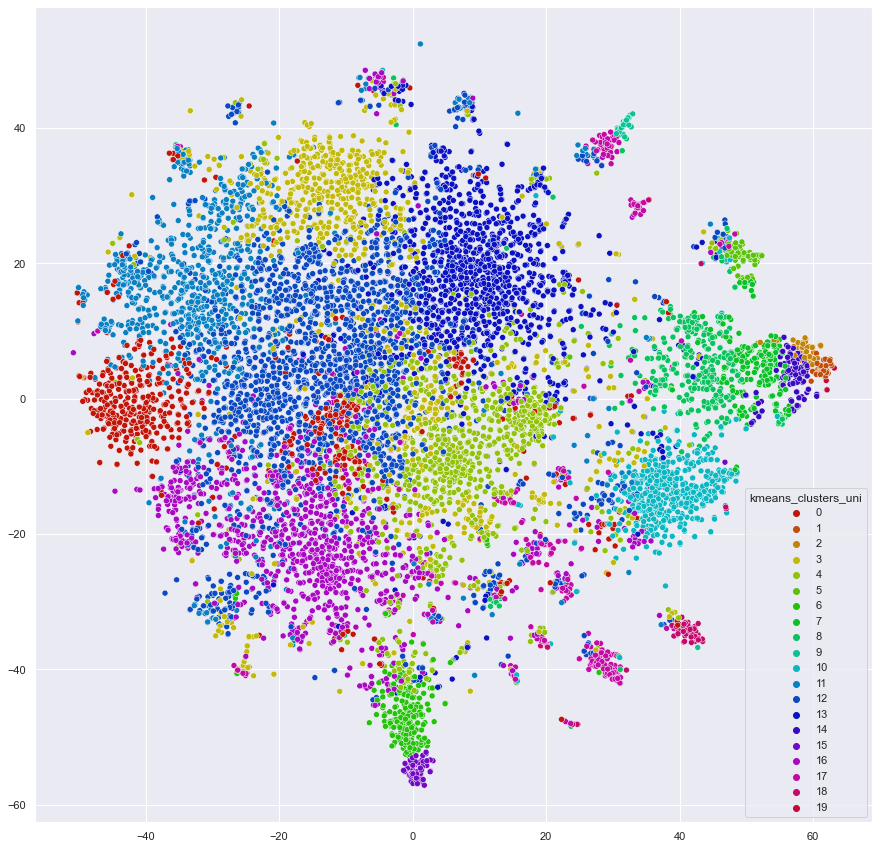

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})

palette = sns.hls_palette(20, l=.4, s=.9)

sns.scatterplot(tsne_results[:,0], tsne_results[:,1], hue=df_cs.kmeans_clusters_uni, palette=palette, legend='full')